# Analyzing the Evolution of Union Membership and Wage Trends in the US
```
Name: Akalanka sakalasooriya
Reg No: 9152PS2024015
Exam No: MSC/DSA/115
```

In [1]:
# imports
import os
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_smooth, geom_vline, labs, theme_minimal, annotate, geom_point, geom_area

In [2]:
# grab data
# URLs for the datasets to download
urls = {
    'demographics.csv': 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-05/demographics.csv',
    'wages.csv': 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-05/wages.csv',
    'states.csv': 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-05/states.csv'
}
folder_path = 'data/2023-09-05'
os.makedirs(folder_path, exist_ok=True)
for filename, url in urls.items():
    df = pd.read_csv(url)
    file_path = os.path.join(folder_path, filename)
    df.to_csv(file_path, index=False)

In [3]:
# read the datasets
demographics = pd.read_csv('data/2023-09-05/demographics.csv')
wages = pd.read_csv('data/2023-09-05/wages.csv')
states = pd.read_csv('data/2023-09-05/states.csv')

## Story Telling

### Union Membership Percentage Over Time

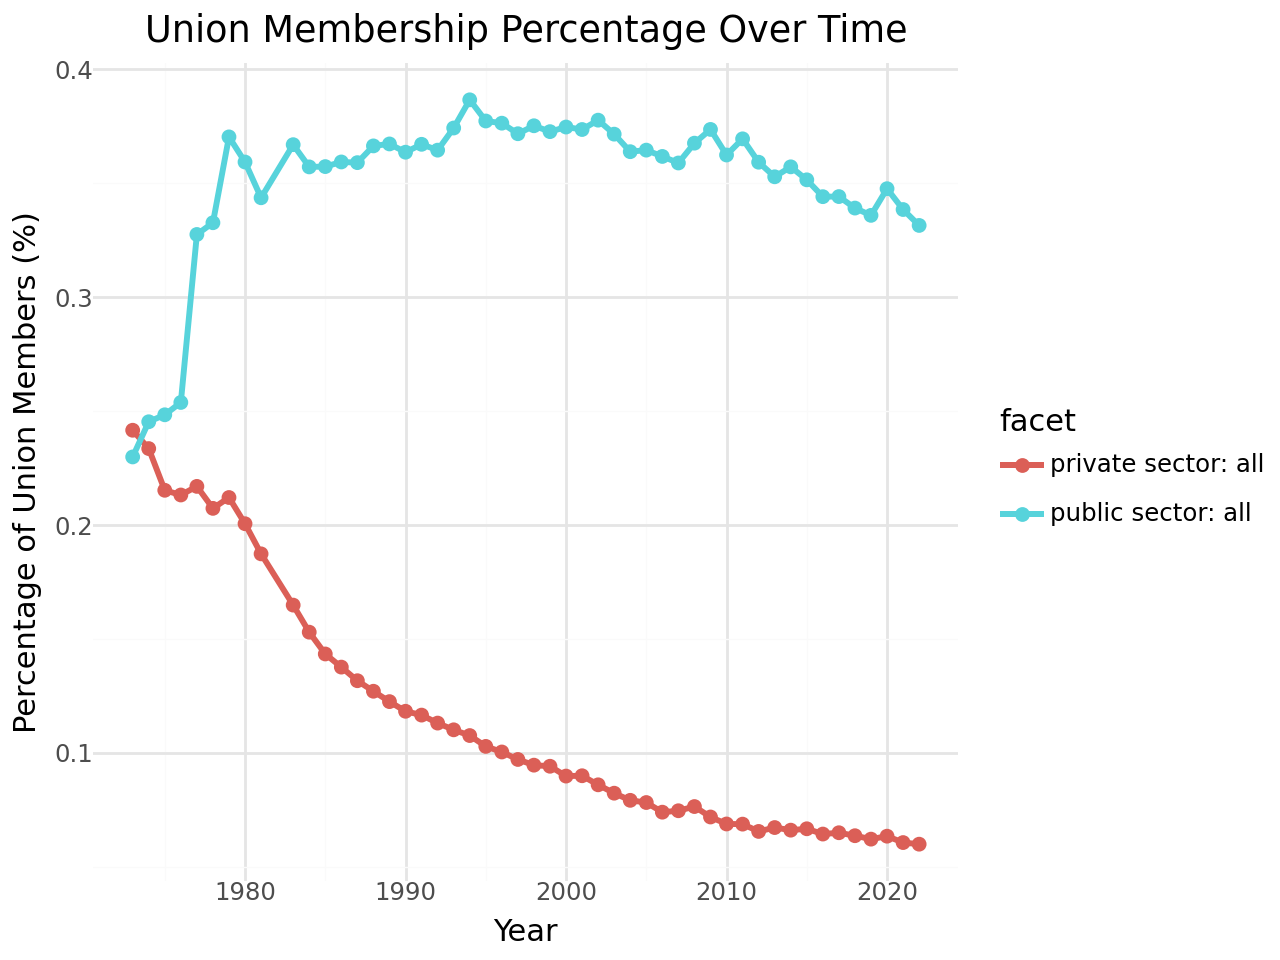

In [4]:
union_trends = demographics.groupby(['year', 'facet']).agg({'p_members': 'mean'}).reset_index()
key_facets = ['male', 'female', 'public sector: all', 'private sector: all']
#
simplified_union_trends = union_trends[union_trends['facet'].isin(key_facets)]

plot_simplified_union_trend = (
    ggplot(simplified_union_trends, aes(x='year', y='p_members', color='facet')) +
    geom_line(size=1.2) +
    geom_point(size=2) +
    labs(title='Union Membership Percentage Over Time',
         x='Year',
         y='Percentage of Union Members (%)') +
    theme_minimal()
)
plot_simplified_union_trend.show()


The decline in union membership in the U.S. over the past five decades has been stark, especially in the private sector. 

- In the early 1970s, around 20% of private sector workers were union members.  
- By 2020, that number had dwindled to less than 10%.

On the other hand, the public sector has seen a more stable union presence:

- 35-40% membership rate has been maintained in the public sector.

This divergence reflects broader US economic and policy shifts in the late 1980s and early 1990s, such as:

- Deindustrialization, which hit the private sector hardest.  
- As manufacturing jobs historically more unionized disappeared.  
- And service-based jobs grew, union presence in private sectors plummeted.


### Union Wage Premium Over Time

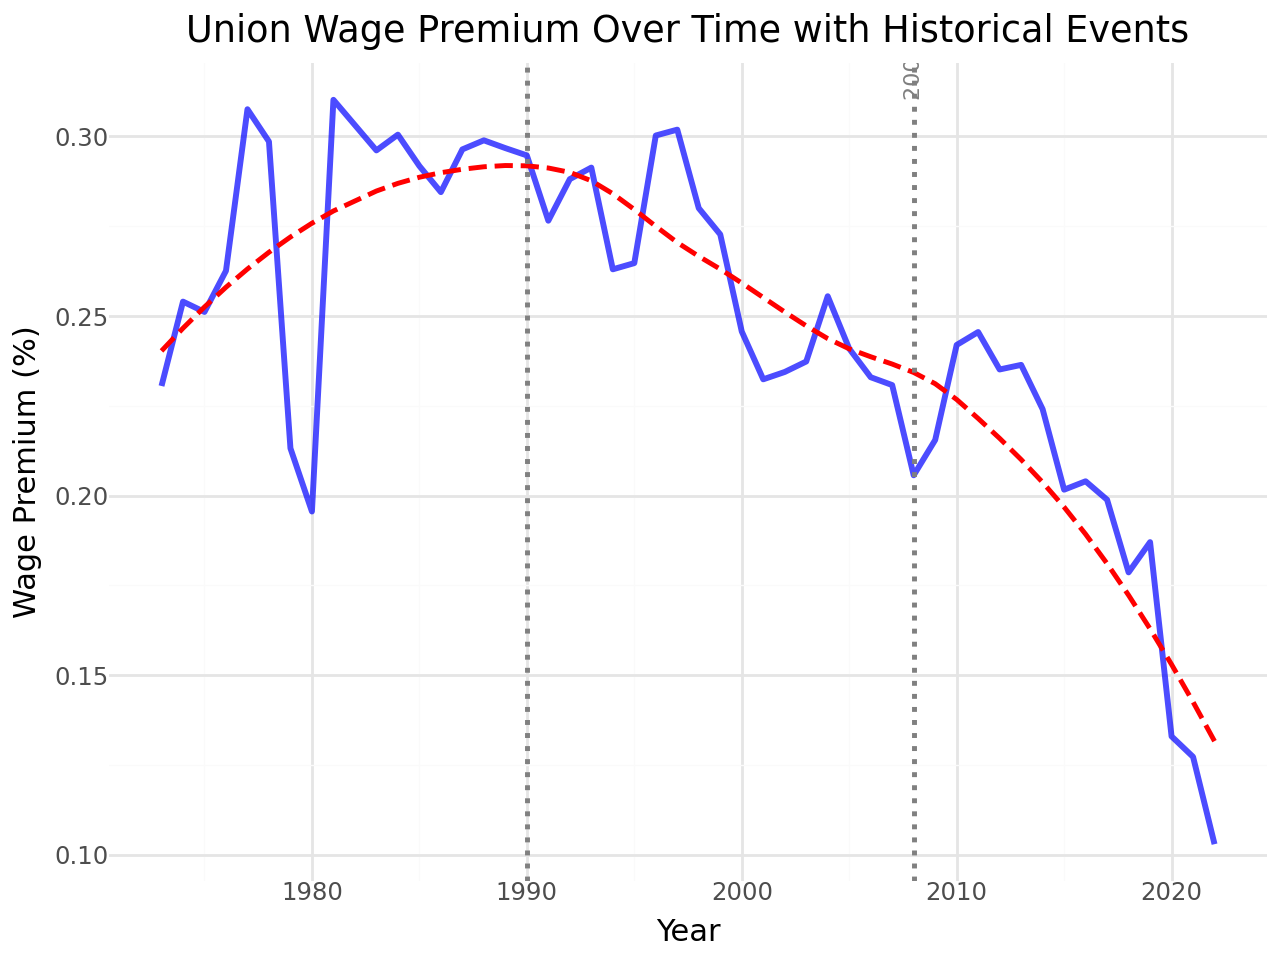

In [5]:

wage_premium = wages.groupby(['year']).agg({'union_wage_premium_raw': 'mean'}).reset_index()
plot_wage_premium = (
    ggplot(wage_premium, aes(x='year', y='union_wage_premium_raw')) +
    geom_line(color='blue', size=1.2, alpha=0.7) + 
    geom_smooth(method='loess', color='red', linetype='dashed', se=False) +  # smoothed treand line
    geom_vline(xintercept=2008, linetype='dotted', color='grey', size=1) +  # marking 2008 recession
    geom_vline(xintercept=1990, linetype='dotted', color='grey', size=1) +  # marking labor market shifts
    annotate('text', x=2008, y=wage_premium['union_wage_premium_raw'].max(),
             label='2008 Recession', color='grey', angle=90, va='bottom', size=8) +
    labs(title='Union Wage Premium Over Time with Historical Events',
         x='Year',
         y='Wage Premium (%)') +
    theme_minimal()
)

plot_wage_premium.show()


The union wage premium, the extra earnings union workers make compared to non-union workers, peaked in the late 1970s at over 30%. 

However, the premium began to decline as the U.S. economy shifted. This downward trend was particularly sharp in the:

- 1990s  
- Post-2000s

Key factors influencing this decline include:

- Deindustrialization  
- Technological advances that weakened union power  
- Policy changes  
- Corporate practices reducing unions' bargaining power  
- 2008 Recession, which further weakened the bargaining power of unions. The economic downturn led to widespread job losses, particularly in industries with high unionization rates, and companies pushed for wage concessions and benefits cuts, undermining union influence.

By 2020, the premium had fallen to around 15%, emphasizing the diminishing economic advantages of union membership.


### Wage Trends for Union vs Non-Union Workers

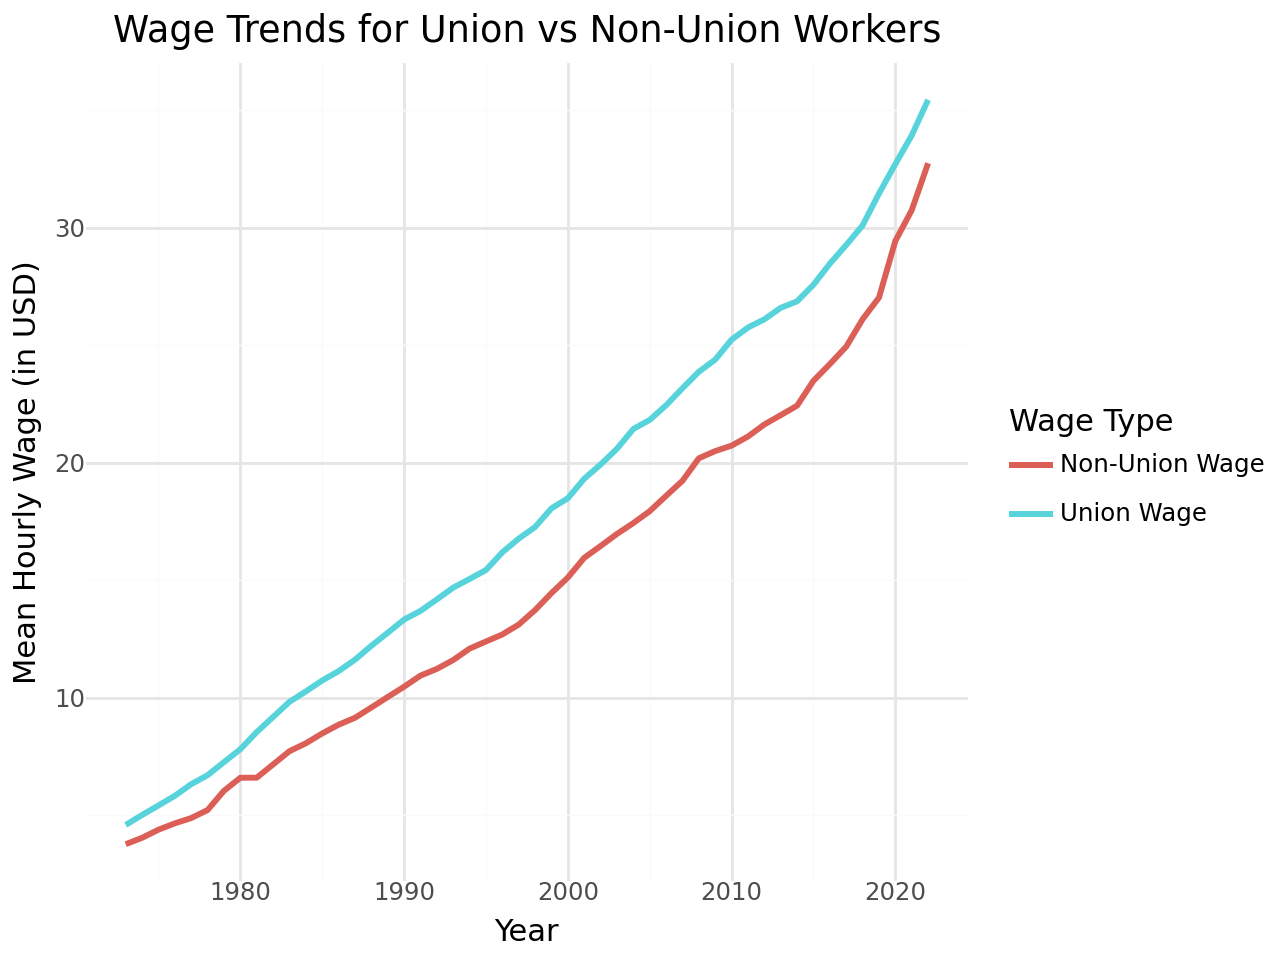

In [6]:
wage_trends = wages.groupby(['year']).agg({'union_wage': 'mean', 'nonunion_wage': 'mean'}).reset_index()
wage_trends_melted = pd.melt(wage_trends, id_vars='year', value_vars=['union_wage', 'nonunion_wage'],
                             var_name='Wage Type', value_name='Wage')
wage_trends_melted['Wage Type'] = wage_trends_melted['Wage Type'].replace({
    'union_wage': 'Union Wage', 
    'nonunion_wage': 'Non-Union Wage'
})
plot_wage_trend = (
    ggplot(wage_trends_melted, aes(x='year', y='Wage', color='Wage Type')) +
    geom_line(size=1.2) +
    labs(title='Wage Trends for Union vs Non-Union Workers',
         x='Year',
         y='Mean Hourly Wage (in USD)') +
    theme_minimal()
)

plot_wage_trend.show()


Despite the decline in union membership and the wage premium, union workers consistently earned higher wages than their non-union counterparts. 

This wage gap has persisted and even widened over time, reflecting unions' ability to secure better pay for their members.

- By 2020, union workers earned over $30 per hour, while non-union workers earned under $30.

This trend highlights the importance of union representation in securing higher wages, although the decreasing union presence means fewer workers benefit from these higher wages.


### Union Membership by Region Over Time

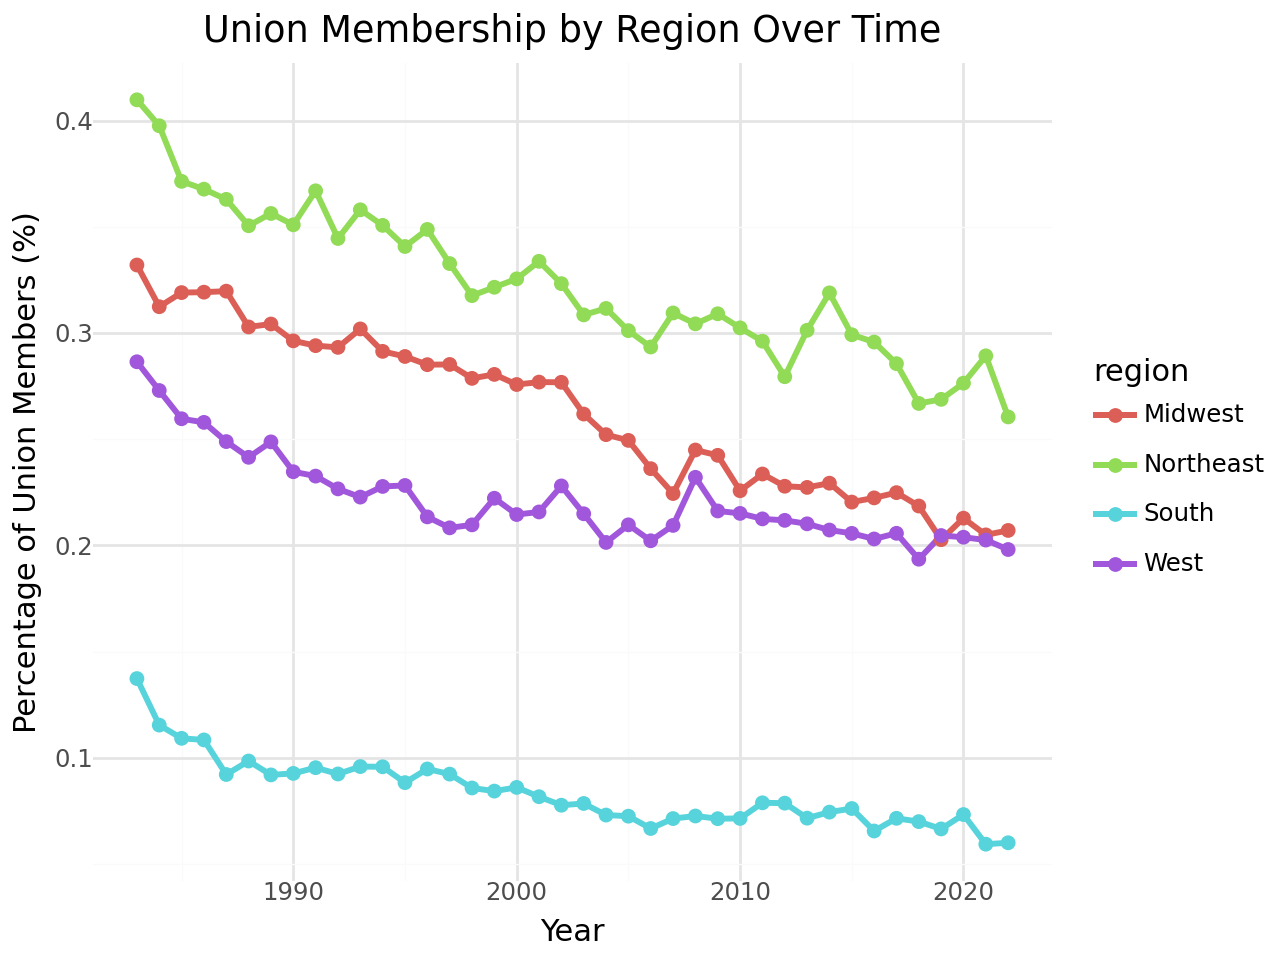

In [7]:
state_to_region = {
    'California': 'West', 'New York': 'Northeast', 'Texas': 'South', 'Florida': 'South', 
    'Illinois': 'Midwest', 'Ohio': 'Midwest',
}
states['region'] = states['state'].map(state_to_region)

region_union = states.groupby(['year', 'region']).agg({'p_members': 'mean'}).reset_index()
plot_region_union = (
    ggplot(region_union, aes(x='year', y='p_members', color='region')) +
    geom_line(size=1.2) +
    geom_point(size=2) +
    labs(title='Union Membership by Region Over Time',
         x='Year',
         y='Percentage of Union Members (%)') +
    theme_minimal()
)
plot_region_union.show()

Union membership has varied significantly by region:

- The Northeast has consistently maintained the highest levels of union membership.  
- The South has the lowest levels of union membership.

Regions like the Midwest and West show significant declines in membership over time, likely tied to the:

- Decline of industries like manufacturing, especially in the Midwest's Rust Belt.

The South's historically low union membership rates reflect:

- A different regional labor market, characterized by right-to-work laws and less union-friendly policies.

This geographical disparity highlights how regional economic structures and policies shape union presence.


### Coverage by Demographic Group Over Time

/home/akalanka/miniconda3/envs/sjp-sw/lib/python3.10/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 8 rows containing missing values.


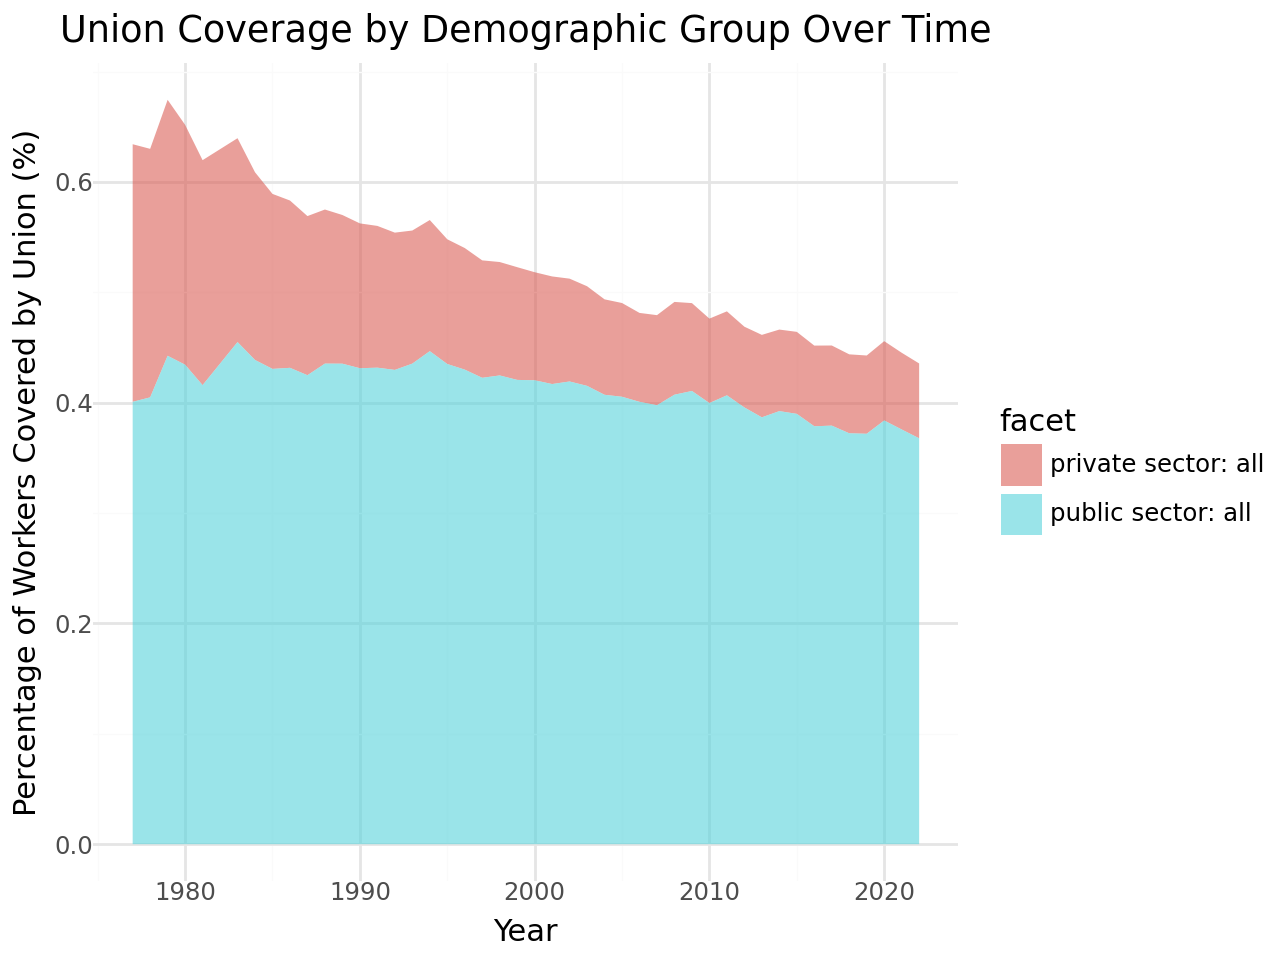

In [8]:
union_coverage = demographics.groupby(['year', 'facet']).agg({'p_covered': 'mean'}).reset_index()
key_groups = ['male', 'female', 'public sector: all', 'private sector: all']
simplified_union_coverage = union_coverage[union_coverage['facet'].isin(key_groups)]
area_plot = (
    ggplot(simplified_union_coverage, aes(x='year', y='p_covered', fill='facet')) +
    geom_area(alpha=0.6) +
    labs(title='Union Coverage by Demographic Group Over Time',
         x='Year',
         y='Percentage of Workers Covered by Union (%)') +
    theme_minimal()
)
area_plot.show()


Union coverage (The percentage of workers covered by a union contract) paints a broader picture:

- Public sector coverage has remained relatively stable at around 30%.  
- Private sector coverage has declined sharply.

In the 1970s, private sector coverage was around 30%, but by 2020 it had dropped to below 10%. 

This decline underscores the challenges unions face in the private sector, with fewer workers benefiting from collective bargaining agreements, contributing to the overall erosion of union power.


### Conclusion
These graphics illustrate the US union collapse, especially in the private sector. Over the past fifty years, the labor market has seen significant change due to a variety of factors, including regulatory changes, regional differences, and economic upheavals like deindustrialization and technological advancements. The average salary of union workers is still higher, but fewer workers are benefiting from union representation, as seen by the declining membership and coverage rates. As a result, the salary advantage that unions once provided is no longer as great, and the gap between them is widening.

References:
- https://www.epi.org/blog/union-decline-rising-inequality-charts/
- https://www.bls.gov/opub/mlr/1986/06/art1full.pdf